In [1]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


In [2]:
df = pd.read_csv("C:/Users/Marquis Sills/Desktop/DataBootCamp/project_1/election_improve.csv")



In [3]:
democrat=df.loc[df["Biden/Harris Democratic"] > df["Trump/Pence Republican"]]
republican = df.loc[df["Trump/Pence Republican"] > df["Biden/Harris Democratic"]]

In [4]:
dem_death = democrat[["State or district","DEATHS, 2020"]]
rep_death =republican[["State or district","DEATHS, 2020"]]

## Checking the Normal Distribution 

In [5]:
mean_numpy = np.mean(dem_death["DEATHS, 2020"])
print(f"The mean covid death rates for democrats are {mean_numpy}")

median_numpy = np.median(dem_death["DEATHS, 2020"])
print(f"The median covid death rates for democrats are {median_numpy}")

standard_deviation_numpy = np.std(dem_death["DEATHS, 2020"])
print(f"The standard deviation of covid deaths for democrats are {standard_deviation_numpy}")


The mean covid death rates for democrats are 8086.48
The median covid death rates for democrats are 5432.0
The standard deviation of covid deaths for democrats are 8970.08033908281


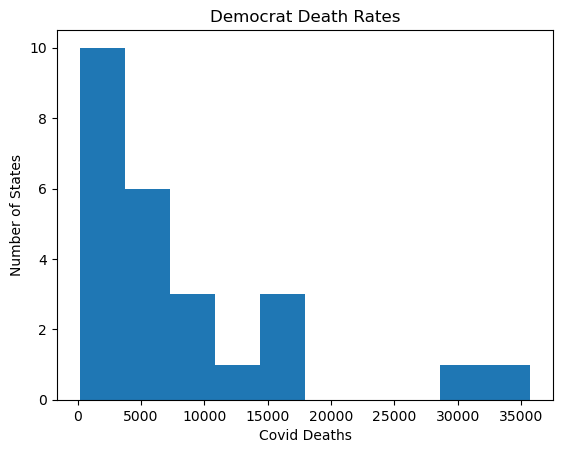

NormaltestResult(statistic=18.25211480427005, pvalue=0.00010879367035325268)


In [6]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(dem_death["DEATHS, 2020"])
plt.xlabel('Covid Deaths')
plt.title("Democrat Death Rates")
plt.ylabel('Number of States')
plt.show()
print(st.normaltest(dem_death["DEATHS, 2020"]))

In [7]:
mean_numpy = np.mean(rep_death["DEATHS, 2020"])
print(f"The mean covid death rates for republican are {mean_numpy}")

median_numpy = np.median(rep_death["DEATHS, 2020"])
print(f"The median covid death rates for republican are {median_numpy}")

standard_deviation_numpy = np.std(rep_death["DEATHS, 2020"])
print(f"The standard deviation of covid deaths for republican are {standard_deviation_numpy}")


The mean covid death rates for republican are 5913.52
The median covid death rates for republican are 4336.0
The standard deviation of covid deaths for republican are 6621.290128789102


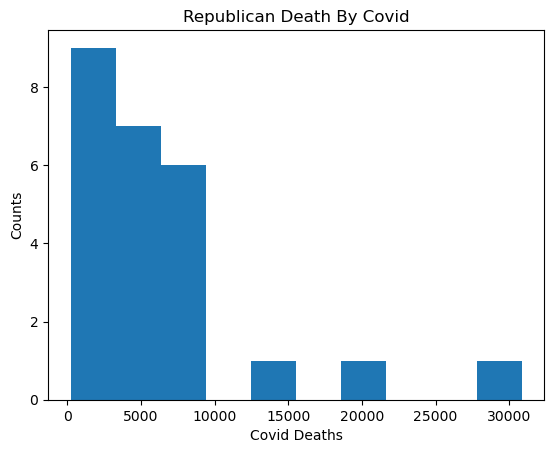

NormaltestResult(statistic=29.901166102567274, pvalue=3.2139882122246057e-07)


In [8]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(rep_death["DEATHS, 2020"])
plt.xlabel('Covid Deaths')
plt.title("Republican Death By Covid")
plt.ylabel('Counts')
plt.show()
print(st.normaltest(rep_death["DEATHS, 2020"]))

In [9]:
#Finding outliers for Democrats
quartiles = dem_death["DEATHS, 2020"].quantile([.25,.5,.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
iqr = q3-q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
outliers = dem_death.loc[(dem_death["DEATHS, 2020"] > upper_bound) | (dem_death["DEATHS, 2020"] < lower_bound)]
outliers


,State or district,"DEATHS, 2020"
4,California,31335
31,New York,35736


In [10]:
#Finding Outliers for Republicans
quartiles = rep_death["DEATHS, 2020"].quantile([.25,.5,.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
iqr = q3-q1
    
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)


outliers = rep_death.loc[(rep_death["DEATHS, 2020"] > upper_bound) | (rep_death["DEATHS, 2020"] < lower_bound)]
outliers

,State or district,"DEATHS, 2020"
8,Florida,19231
42,Texas,30840


{'whiskers': [<matplotlib.lines.Line2D object at 0x0000024B78EC50D0>, <matplotlib.lines.Line2D object at 0x0000024B78EC5370>, <matplotlib.lines.Line2D object at 0x0000024B78ED43A0>, <matplotlib.lines.Line2D object at 0x0000024B78ED4640>], 'caps': [<matplotlib.lines.Line2D object at 0x0000024B78EC5610>, <matplotlib.lines.Line2D object at 0x0000024B78EC58B0>, <matplotlib.lines.Line2D object at 0x0000024B78ED48E0>, <matplotlib.lines.Line2D object at 0x0000024B78ED4B80>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000024B78EB1DF0>, <matplotlib.lines.Line2D object at 0x0000024B78ED4100>], 'medians': [<matplotlib.lines.Line2D object at 0x0000024B78EC5B50>, <matplotlib.lines.Line2D object at 0x0000024B78ED4E20>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000024B78EC5DF0>, <matplotlib.lines.Line2D object at 0x0000024B78EE3100>], 'means': []}


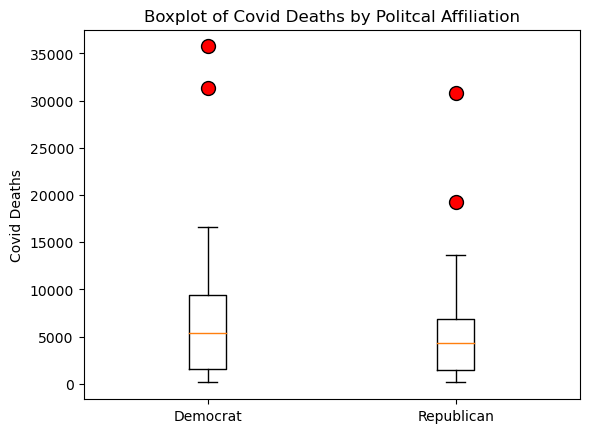

In [11]:
election_list = [dem_death["DEATHS, 2020"],rep_death["DEATHS, 2020"]]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Covid Deaths')
labels = ['Democrat','Republican']
plt.title("Boxplot of Covid Deaths by Politcal Affiliation")
#flierprops={'markerfacecolor': 'red', 'marker': 'D', 'markersize': 8, 'markeredgecolor': 'black'})
#learning something new everyday.
print(ax1.boxplot(election_list,labels = labels,flierprops={'markerfacecolor': 'red', 'marker': 'o','markersize': 10}))

In [12]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(dem_death["DEATHS, 2020"], rep_death["DEATHS, 2020"], equal_var=False)

Ttest_indResult(statistic=0.9548059301482479, pvalue=0.34487281522085833)

----
## Removing Outliers

In [13]:
#Removing Outliers
rep_no_outliers = rep_death["DEATHS, 2020"].drop([8,42])
dem_no_outliers = dem_death["DEATHS, 2020"].drop([4,31])
dem_no_outliers

2      8447
5      4315
6      5782
7      1008
9      9453
10      342
12    15735
18      420
19     6000
20     9319
21    11391
22     5215
27     3238
28      779
29    16497
30     2841
36     1434
37    16609
38     1585
44      144
45     5821
46     3284
48     5432
Name: DEATHS, 2020, dtype: int64

In [14]:
mean_numpy = np.mean(dem_no_outliers)
print(f"The mean covid death rates for democrats are {mean_numpy}")

median_numpy = np.median(dem_no_outliers)
print(f"The median covid death rates for democrats are {median_numpy}")

standard_deviation_numpy = np.std(dem_no_outliers)
print(f"The standard deviation of covid deaths for democrats are {standard_deviation_numpy}")

The mean covid death rates for democrats are 5873.521739130435
The median covid death rates for democrats are 5215.0
The standard deviation of covid deaths for democrats are 5081.653512729932


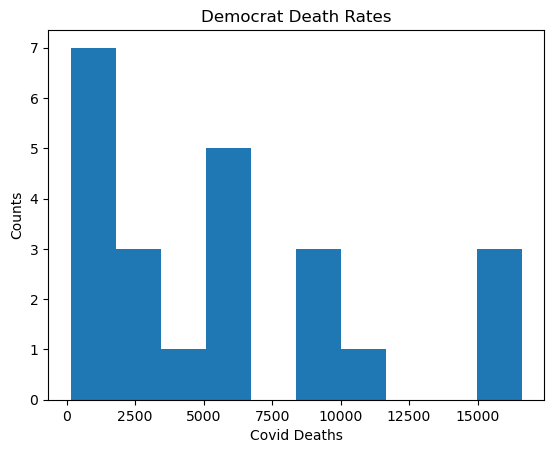

NormaltestResult(statistic=3.803589008089313, pvalue=0.1493004584102795)


In [15]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(dem_no_outliers)
plt.xlabel('Covid Deaths')
plt.title("Democrat Death Rates")
plt.ylabel('Counts')
plt.show()
print(st.normaltest(dem_no_outliers))

In [16]:
mean_numpy = np.mean(rep_no_outliers)
print(f"The mean covid death rates for republican are {mean_numpy}")

median_numpy = np.median(rep_no_outliers)
print(f"The median covid death rates for republican are {median_numpy}")

standard_deviation_numpy = np.std(rep_no_outliers)
print(f"The standard deviation of covid deaths for republican are {standard_deviation_numpy}")

The mean covid death rates for republican are 4250.739130434783
The median covid death rates for republican are 4132.0
The standard deviation of covid deaths for republican are 3188.0283564473334


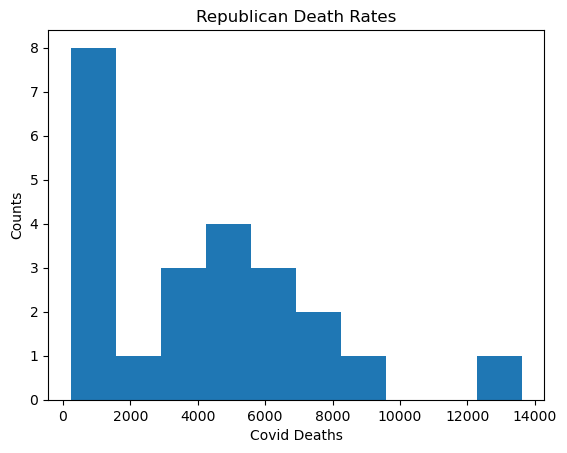

NormaltestResult(statistic=6.660739285151667, pvalue=0.03577987685710655)


In [17]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(rep_no_outliers)
plt.xlabel('Covid Deaths')
plt.title("Republican Death Rates")
plt.ylabel('Counts')
plt.show()
print(st.normaltest(rep_no_outliers))

{'whiskers': [<matplotlib.lines.Line2D object at 0x0000024B79107700>, <matplotlib.lines.Line2D object at 0x0000024B791079A0>, <matplotlib.lines.Line2D object at 0x0000024B79157940>, <matplotlib.lines.Line2D object at 0x0000024B79157BE0>], 'caps': [<matplotlib.lines.Line2D object at 0x0000024B79107C40>, <matplotlib.lines.Line2D object at 0x0000024B79107EE0>, <matplotlib.lines.Line2D object at 0x0000024B79157E80>, <matplotlib.lines.Line2D object at 0x0000024B79165160>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000024B79107460>, <matplotlib.lines.Line2D object at 0x0000024B791576A0>], 'medians': [<matplotlib.lines.Line2D object at 0x0000024B791571C0>, <matplotlib.lines.Line2D object at 0x0000024B79165400>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000024B79157460>, <matplotlib.lines.Line2D object at 0x0000024B791656A0>], 'means': []}


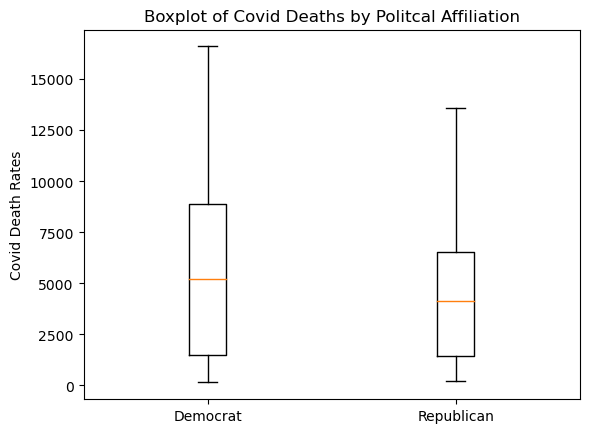

In [18]:
election_list = [dem_no_outliers,rep_no_outliers]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Covid Death Rates')
labels = ['Democrat','Republican']
plt.title("Boxplot of Covid Deaths by Politcal Affiliation")
#flierprops={'markerfacecolor': 'red', 'marker': 'D', 'markersize': 8, 'markeredgecolor': 'black'})
#learning something new everyday.
print(ax1.boxplot(election_list,labels = labels,flierprops={'markerfacecolor': 'red', 'marker': 'o','markersize': 10}))

In [22]:
print(f"The republican states results {st.normaltest(rep_no_outliers)}")
print(f"The democrat states results {st.normaltest(dem_no_outliers)}")

The republican states results NormaltestResult(statistic=6.660739285151667, pvalue=0.03577987685710655)
The democrat states results NormaltestResult(statistic=3.803589008089313, pvalue=0.1493004584102795)


In [20]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(rep_no_outliers, dem_no_outliers, equal_var=False)

Ttest_indResult(statistic=-1.2688214417392842, pvalue=0.21243032880100107)